In [95]:
# Import all the needed tools
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

In [96]:
df = pd.read_csv(r"D:\api\argocd-deployments\machine_learning_heart\heart.csv")

In [97]:
df.shape

(303, 14)

In [98]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [99]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [100]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

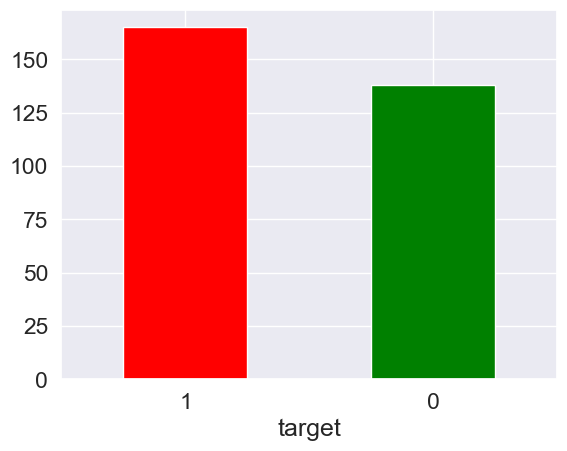

In [101]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"])
plt.xticks(rotation=360)
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [103]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [104]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [105]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [106]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


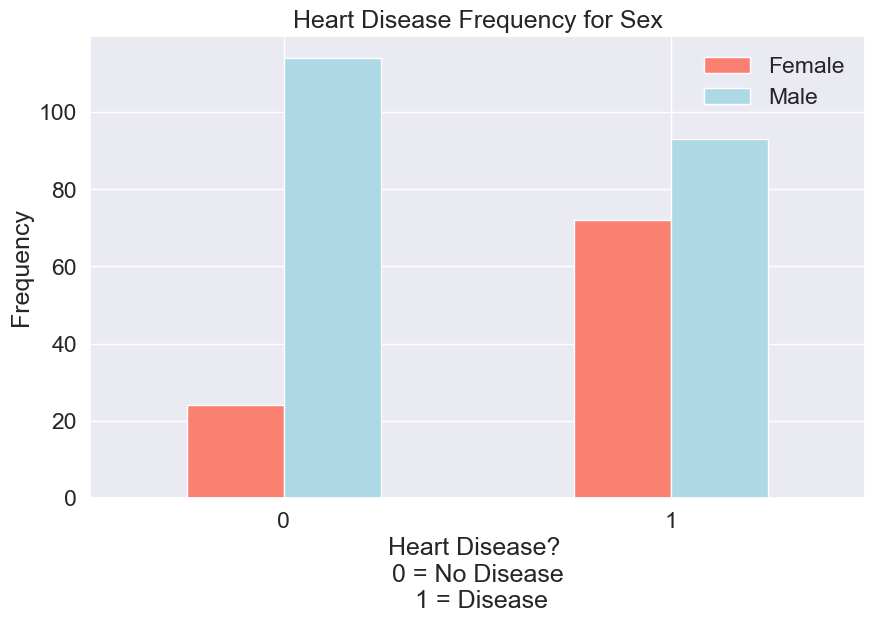

In [107]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

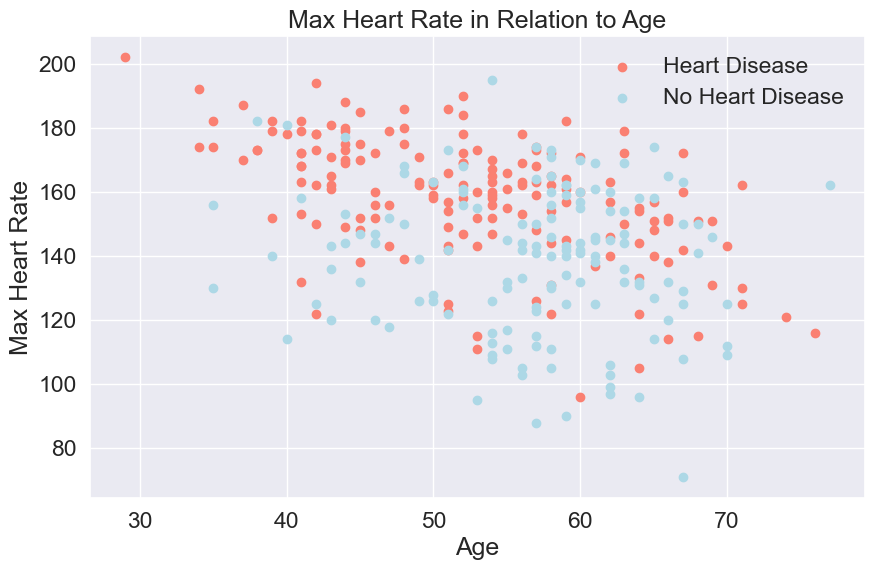

In [108]:
# Create another figure
fig,ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
pos_examples = ax.scatter(df.age[df.target==1],
                          df.thalach[df.target == 1],
                          color="salmon", label="Heart Disease")

# Scatter with negative examples
neg_examples = ax.scatter(df.age[df.target==0],
                          df.thalach[df.target == 0],
                          color="lightblue", label="No Heart Disease")

# Get mean line
mean = df["thalach"].mean()
mean_line = ax.plot()

# Customize the plot
plt.title("Max Heart Rate in Relation to Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

c:\Users\91901\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91901\AppData\Local\Temp\ipykernel_2824\3601724917.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


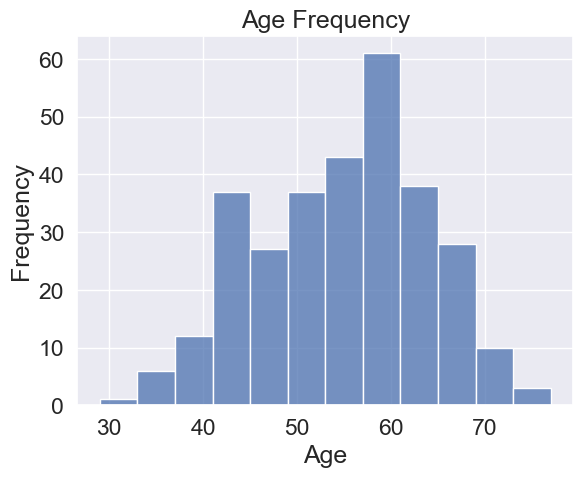

In [109]:
# Check the distribution of the age column with a histogram
sns.histplot(df["age"])
plt.style.use("seaborn-darkgrid")


# Customize the plot
plt.title("Age Frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [110]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


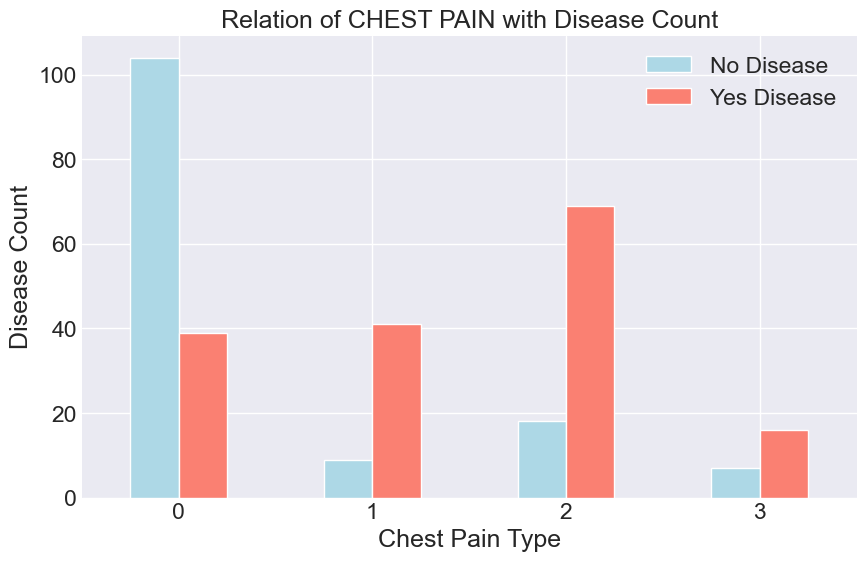

In [111]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])

# Customization
plt.title("Relation of CHEST PAIN with Disease Count")
plt.xlabel("Chest Pain Type")
plt.ylabel("Disease Count")
plt.xticks(rotation=360)
plt.legend(["No Disease", "Yes Disease"])
plt.show()

In [112]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0


In [113]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


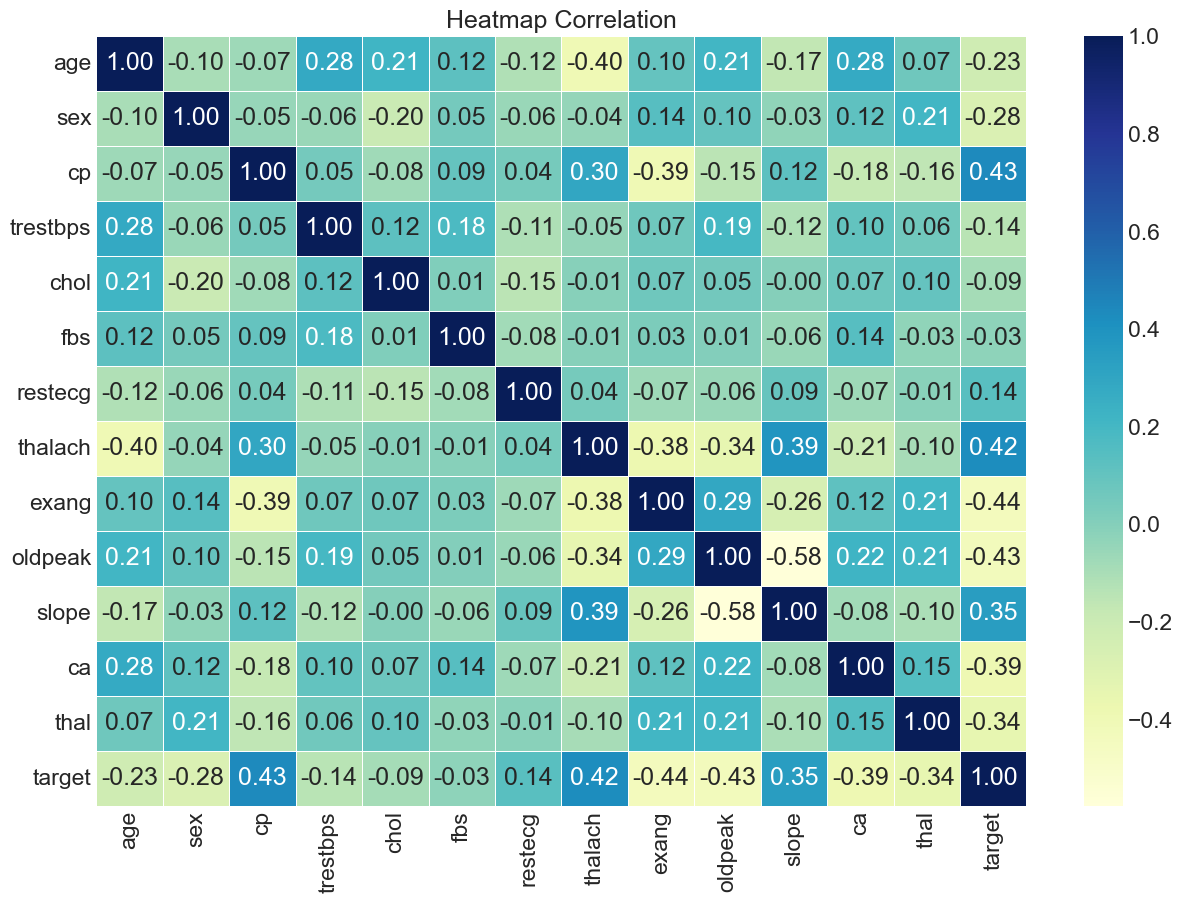

In [114]:
# Let's make our correlation matrix a bit prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
# prompt: split data into  x and y

X = df.drop("target", axis=1)  # whith out target coloum

y = df["target"]  # Only taget value


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Train SVM
svm = SVC()
sm = svm.fit(X_train, y_train)

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
dt = decision_tree.fit(X_train, y_train)

# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=3,criterion="gini", random_state=42)
rf = random_forest.fit(X_train, y_train)

# Train Logistic Regression
logistic_regression = LogisticRegression()
lr = logistic_regression.fit(X_train, y_train)

# Train Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gb = gradient_boosting.fit(X_train, y_train)

# Train Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gnb = gaussian_nb.fit(X_train, y_train)

# Train K-Nearest Neighbors
knn = KNeighborsClassifier()
kn = knn.fit(X_train, y_train)

# Train Neural Network
neural_network = MLPClassifier()
nn = neural_network.fit(X_train, y_train)

c:\Users\91901\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
svm_predictions = svm.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print(classification_report(y_test, decision_tree_predictions))
random_forest_predictions = random_forest.predict(X_test)
logistic_regression_predictions = logistic_regression.predict(X_test)
gradient_boosting_predictions = gb.predict(X_test)
gaussian_nb_predictions = gaussian_nb.predict(X_test)
knn_predictions = knn.predict(X_test)
neural_network_predictions = neural_network.predict(X_test)


# Calculate accuracy for each classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
classification_report(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gaussian_nb_accuracy = accuracy_score(y_test, gaussian_nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)

# Print the accuracy for each classifier
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)
print("Gaussian Naive Bayes Accuracy:", gaussian_nb_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Neural Network Accuracy:", neural_network_accuracy)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

SVM Accuracy: 0.7049180327868853
Decision Tree Accuracy: 0.8360655737704918
Random Forest Accuracy: 0.8688524590163934
Logistic Regression Accuracy: 0.8852459016393442
Gradient Boosting Accuracy: 0.7704918032786885
Gaussian Naive Bayes Accuracy: 0.8688524590163934
K-Nearest Neighbors Accuracy: 0.6885245901639344
Neural Network Accuracy: 0.8524590163934426


In [134]:
training_accuracy_svm = sm.score(X_train, y_train)
training_accuracy_dt = dt.score(X_train, y_train)
training_accuracy_rf = rf.score(X_train, y_train)
training_accuracy_lr = lr.score(X_train, y_train)
training_accuracy_gb = gb.score(X_train, y_train)
training_accuracy_gnb = gnb.score(X_train,y_train)
training_accuracy_kn = kn.score(X_train, y_train)
training_accuracy_nn = nn.score(X_train, y_train)

print("Trainign Accuracy of SVM", training_accuracy_svm )
print("Trainign Accuracy of Decison Tree", training_accuracy_dt )
print("Trainign Accuracy of Random Forest", training_accuracy_rf )
print("Trainign Accuracy of Logistic Regression", training_accuracy_lr )
print("Trainign Accuracy of Gradient Boosting", training_accuracy_gb )
print("Trainign Accuracy of Gaussian Naive Bayes", training_accuracy_gnb )
print("Trainign Accuracy of KNN", training_accuracy_kn )
print("Trainign Accuracy of Neural Networks", training_accuracy_nn )


Trainign Accuracy of SVM 0.6570247933884298
Trainign Accuracy of Decison Tree 1.0
Trainign Accuracy of Random Forest 0.8760330578512396
Trainign Accuracy of Logistic Regression 0.8636363636363636
Trainign Accuracy of Gradient Boosting 1.0
Trainign Accuracy of Gaussian Naive Bayes 0.8181818181818182
Trainign Accuracy of KNN 0.7603305785123967
Trainign Accuracy of Neural Networks 0.8347107438016529


In [121]:
print("Random Forest:")
print(classification_report(y_test, random_forest_predictions))


Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



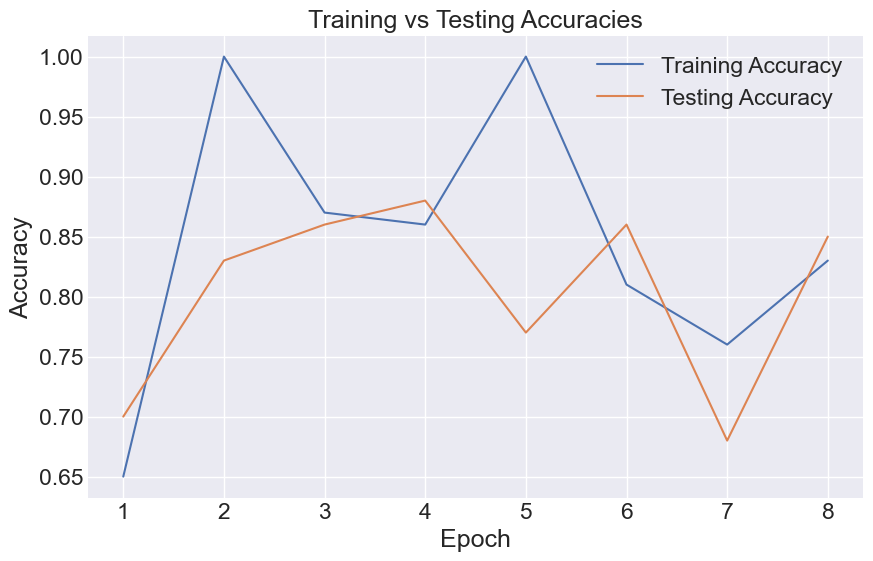

In [137]:
import matplotlib.pyplot as plt

# Sample data: replace these with your actual accuracies
training_accuracies = [0.65,1.0,0.87,0.86,1.0,0.81,0.76,0.83]
testing_accuracies = [0.70,0.83,0.86,0.88,0.77,0.86,0.68,0.85]

# Assuming these accuracies correspond to epochs 1 through 5
epochs = range(1, 9)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, label='Training Accuracy')
plt.plot(epochs, testing_accuracies, label='Testing Accuracy')
plt.title('Training vs Testing Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
print("SVM:")
print(classification_report(y_test, svm_predictions))


SVM:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



In [124]:
print("Decision Tree:")
print(classification_report(y_test,decision_tree_predictions ))


Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [125]:
print("Neural Networks:")
print(classification_report(y_test,neural_network_predictions ))


Neural Networks:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [126]:
print("Logistic Regression:")
print(classification_report(y_test,logistic_regression_predictions ))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [127]:
print("KNN:")
print(classification_report(y_test, knn_predictions))


KNN:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [128]:
print("Gradient Boosting: ")
print(classification_report(y_test, gradient_boosting_predictions))

Gradient Boosting: 
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [129]:
print("Random Forest:")
print(classification_report(y_test, random_forest_predictions))

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [140]:
# HyperParameter Tuning
# Let's tune the KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

C:\Users\91901\AppData\Local\Temp\ipykernel_2824\2952985523.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


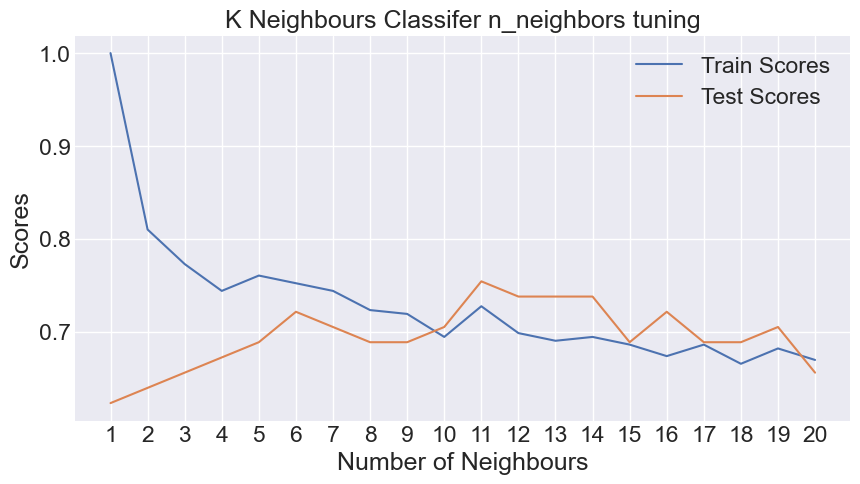

Max KNN score on train data: 100.00%
Max KNN score on test data: 75.41%


In [141]:
# Set Style
plt.style.use("seaborn-darkgrid")

# Create Figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Plot the Neighbours and their respective scores
ax.plot(neighbours, train_scores, label = "Train Scores")
ax.plot(neighbours, test_scores, label = "Test Scores")

# Some customizations
plt.title("K Neighbours Classifer n_neighbors tuning")
plt.xlabel("Number of Neighbours")
plt.ylabel("Scores")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

# Info
print(f"Max KNN score on train data: {max(train_scores)*100:.2f}%")
print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")# Create a hyperparameter grid for LogisticRegression
logistic_regression_grid = {"C" : np.logspace(-4, 4, 20),
                           "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
                           }

# Create hyperparameter grid for RandomForestClassifier
random_forest_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [142]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparamter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(solver='saga', max_iter=10000),
                               param_distributions=logistic_regression_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=False)

# Fit random hyperamater model for Logistic Regression
rs_log_reg.fit(X_train, y_train )

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000, solver='saga'),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=False)

In [143]:
rs_log_reg.best_estimator_

LogisticRegression(C=545.5594781168514, max_iter=10000, solver='sag')

In [144]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [145]:
# Set random seed
np.random.seed(42)

# Setup random hyperparamter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_forest_grid,
                          cv = 5,
                          n_iter = 10,
                          verbose=True)

# Fit random hyperamater model for Random Forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
grid_search_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
grid_search_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparmaters
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
grid_search_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Make predictions
y_preds = grid_search_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

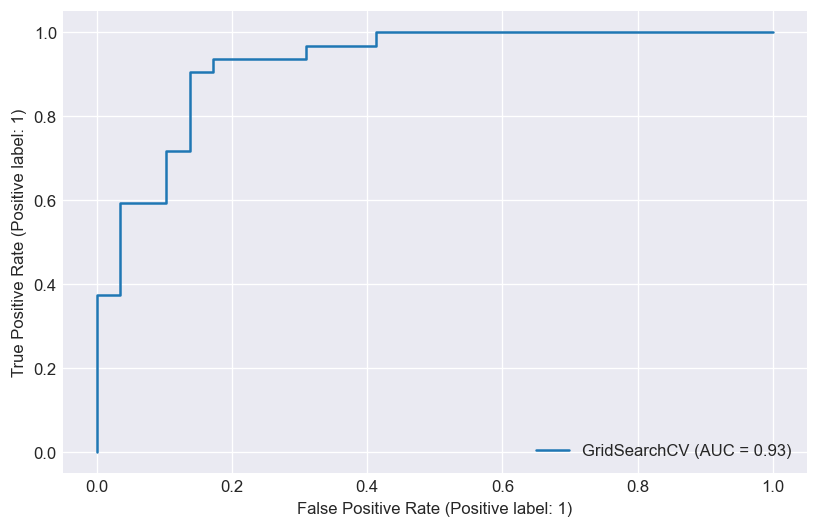

In [ ]:
# Plot a ROC curve and get AUC Score
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay instead

fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
RocCurveDisplay.from_estimator(grid_search_log_reg, X_test, y_test, ax=ax) # Use RocCurveDisplay to plot the curve
plt.show()

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


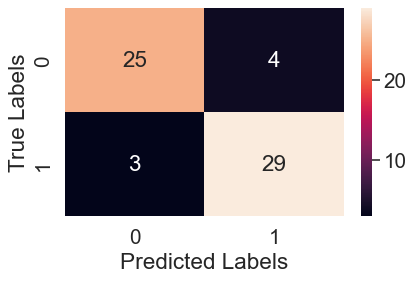

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap
    """

    fig, ax = plt.subplots(figsize = (5, 3), dpi=90)
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
plot_conf_matrix(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Check the best params of our tuned model
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [166]:
# Create a new classifier with these paramters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')


In [167]:
# Cross Validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [168]:
# Cross Validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision


0.8207936507936507

In [169]:
# Cross Validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# Cross Validated f-1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [ ]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F-1 Score" : cv_f1
}, index=["Cross-Validated Scores"])
cv_metrics

,Accuracy,Precision,Recall,F-1 Score
Cross-Validated Scores,0.844699,0.820794,0.921212,0.867301


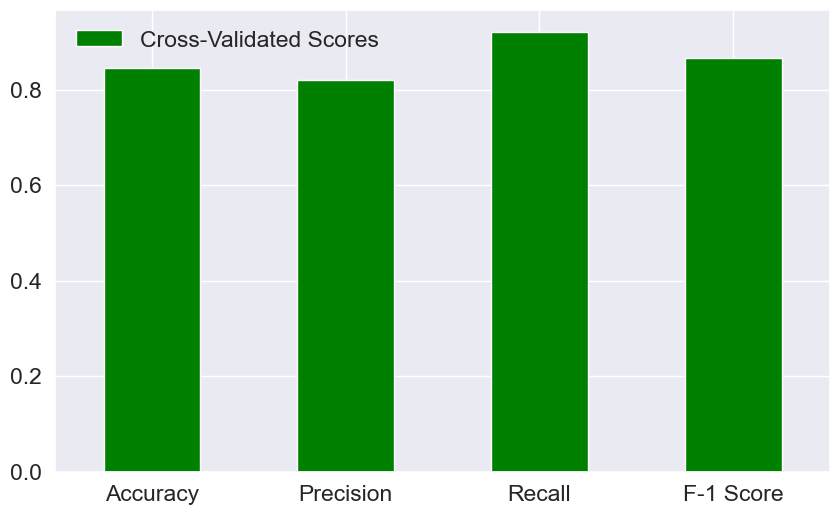

In [ ]:
cv_metrics.T.plot.bar(figsize=(10, 6), color="green")
plt.xticks(rotation = 360)
plt.show()